<a href="https://colab.research.google.com/github/AnjaliBiju/Machine-Learning-Colab/blob/main/Predicting_Advertisement_Clicks_Using_User_Behaviour_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1]:
from google.colab import files
uploaded=files.upload()

Saving advertising.xls to advertising.xls


In [2]:
from google.colab import files
uploaded=files.upload()

Saving advertising.csv to advertising.csv


In [5]:
ad_data=pd.read_csv('advertising.csv')

In [6]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [7]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [8]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


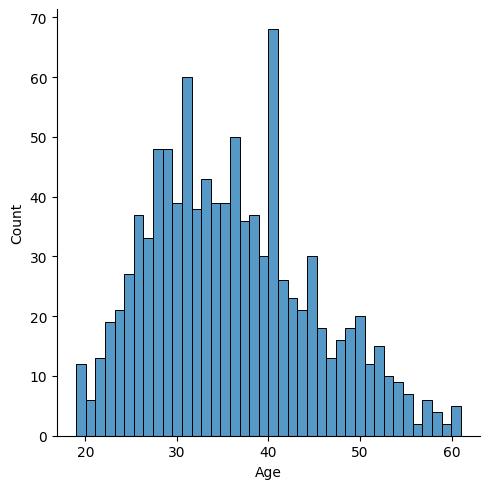

In [14]:
sns.displot(ad_data['Age'],kde=False,bins=40)

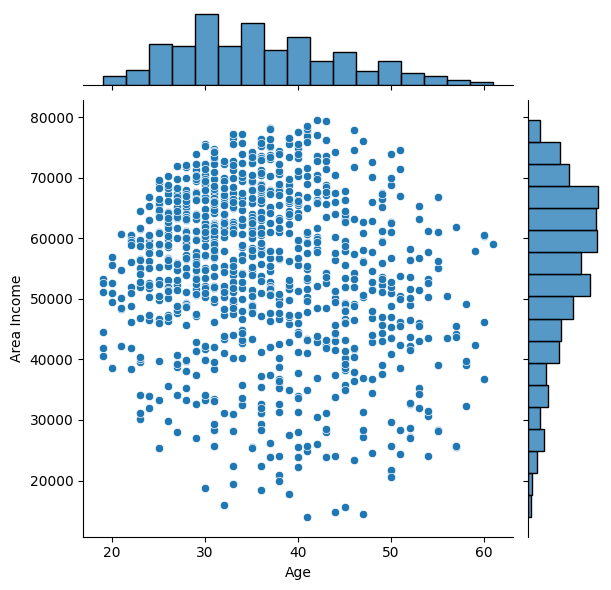

In [15]:
sns.jointplot(x='Age',y='Area Income',data=ad_data)

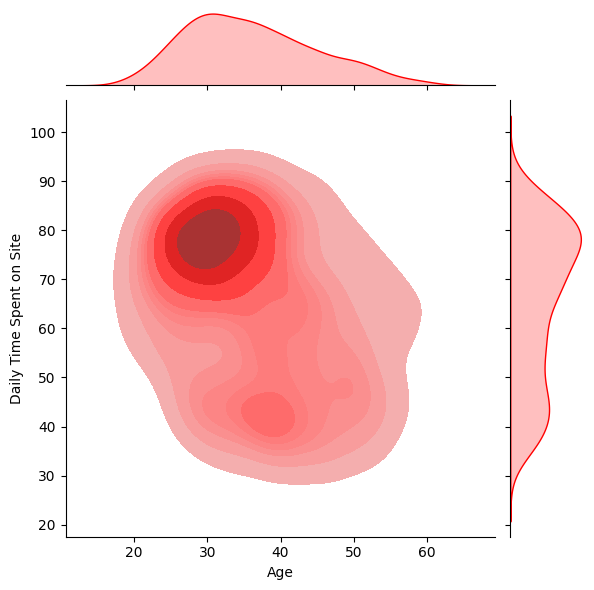

In [18]:
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=ad_data,kind='kde',fill=True,color='#FF0000')

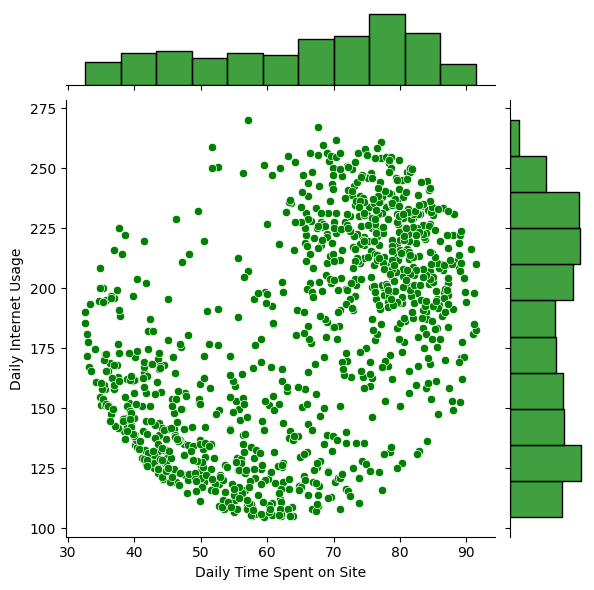

In [20]:
sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=ad_data,color='green',kind='scatter')

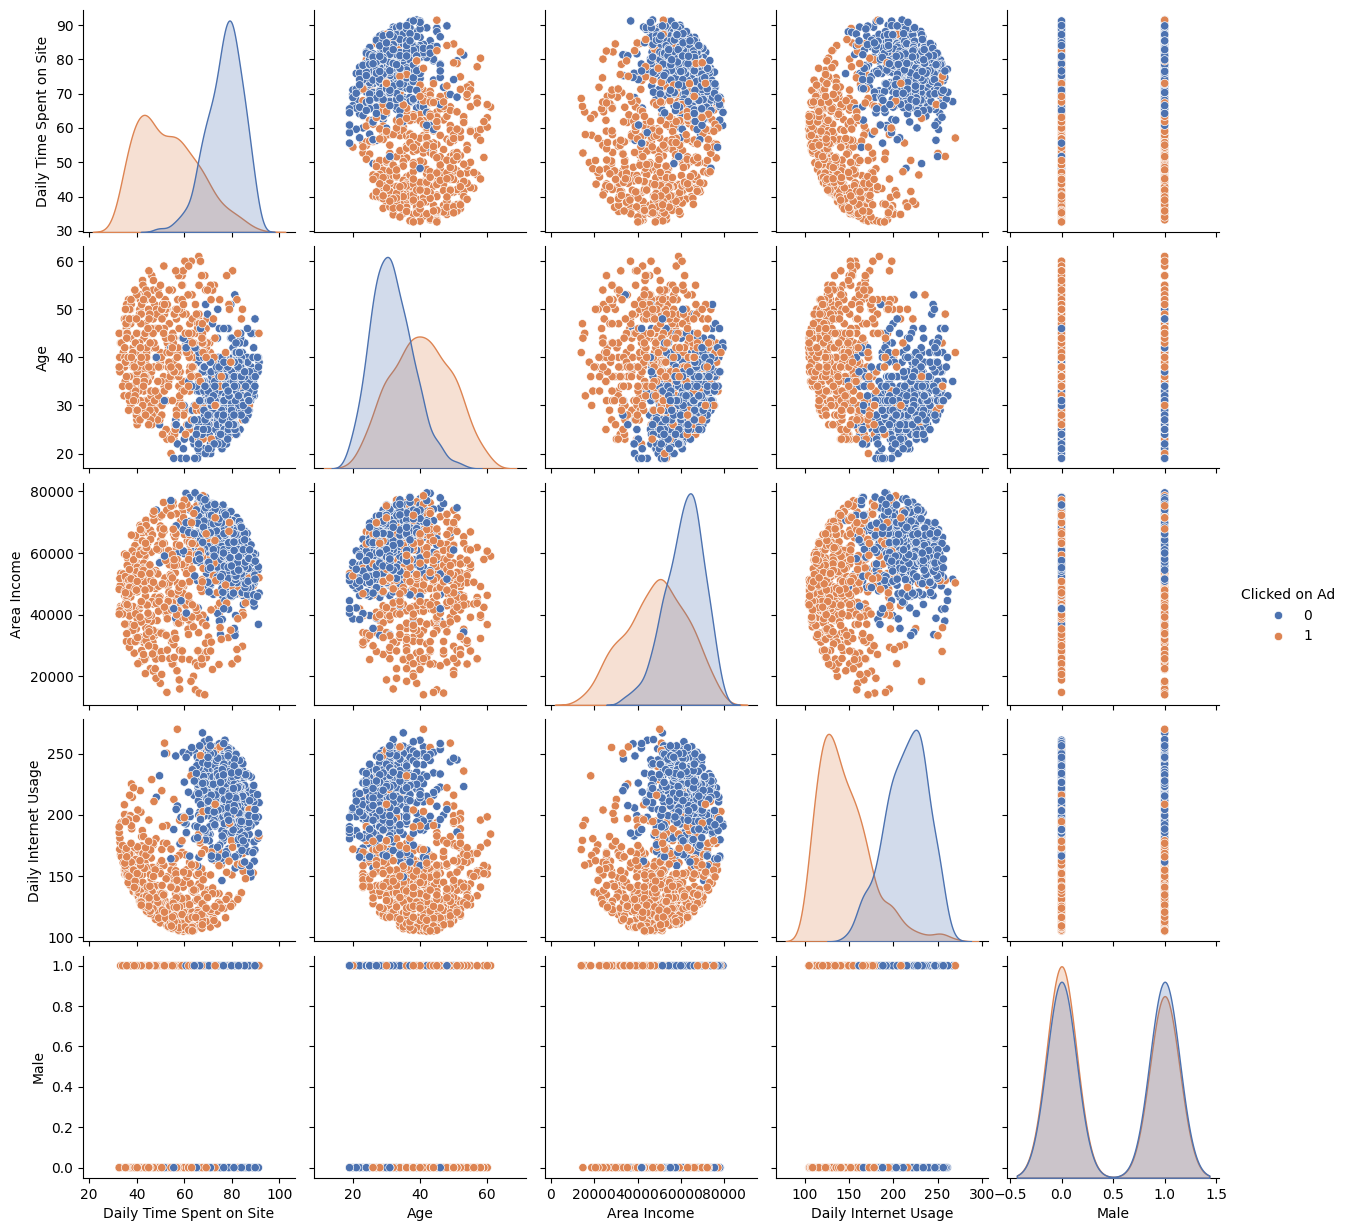

In [21]:
sns.pairplot(data=ad_data,hue='Clicked on Ad',palette='deep')

In [28]:
#either remove all the non numeric columns or convert them to numeric in order to get prediction
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [29]:
ad_data.drop('Ad Topic Line',axis=1,inplace=True)

In [30]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,South Manuel,0,Iceland,2016-06-03 03:36:18,0


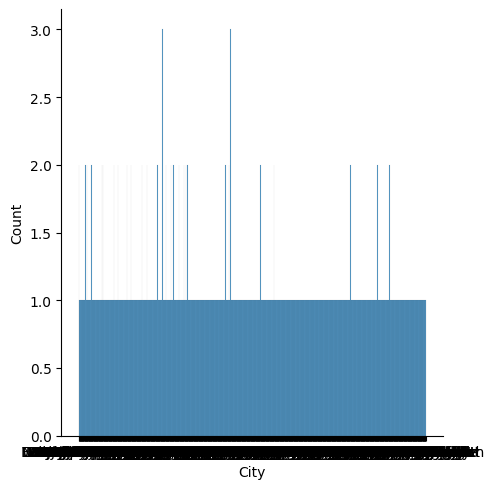

In [32]:
#to check whether we need to drop the city or we can convert it into some form of numerical value
sns.displot(ad_data['City'])

In [33]:
ad_data.drop('City',axis=1,inplace=True)

In [34]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,0,Iceland,2016-06-03 03:36:18,0


<Axes: xlabel='count', ylabel='Country'>

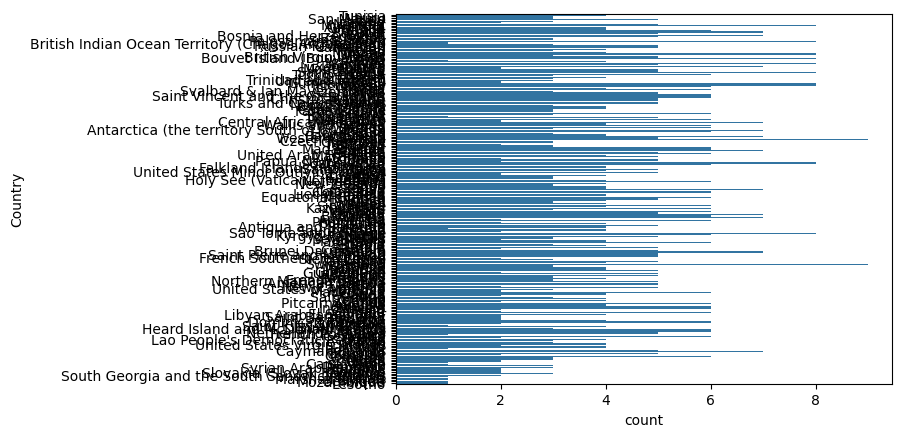

In [35]:
sns.countplot(ad_data['Country'])

In [36]:
#too much countries to be converted into a number.. so drop country
ad_data.drop('Country',axis=1,inplace=True)

In [37]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,0,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,1,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,0,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,1,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,0,2016-06-03 03:36:18,0


In [38]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Male                      1000 non-null   int64  
 5   Timestamp                 1000 non-null   object 
 6   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 54.8+ KB


In [39]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,0,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,1,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,0,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,1,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,0,2016-06-03 03:36:18,0


In [40]:
ad_data.tail()
#we understand that the year of the data is same..2016..so no need to extract year

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad
995,72.97,30,71384.57,208.58,1,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,1,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,1,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,0,2016-03-24 02:35:54,0
999,45.01,26,29875.80,178.35,0,2016-06-03 21:43:21,1


In [43]:
#convert Timestamp to datetime first.. then only we can extract relevant data from it
ad_data['Timestamp']=pd.to_datetime(ad_data['Timestamp'])

In [49]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,Month,Hour
0,68.95,35,61833.90,256.09,0,2016-03-27 00:53:11,0,3,0
1,80.23,31,68441.85,193.77,1,2016-04-04 01:39:02,0,4,1
2,69.47,26,59785.94,236.50,0,2016-03-13 20:35:42,0,3,20
3,74.15,29,54806.18,245.89,1,2016-01-10 02:31:19,0,1,2
4,68.37,35,73889.99,225.58,0,2016-06-03 03:36:18,0,6,3


In [46]:
ad_data['Month']=ad_data['Timestamp'].dt.month

In [48]:
ad_data['Hour']=ad_data['Timestamp'].dt.hour

In [50]:
ad_data.drop('Timestamp',axis=1,inplace=True)

In [51]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Month,Hour
0,68.95,35,61833.90,256.09,0,0,3,0
1,80.23,31,68441.85,193.77,1,0,4,1
2,69.47,26,59785.94,236.50,0,0,3,20
3,74.15,29,54806.18,245.89,1,0,1,2
4,68.37,35,73889.99,225.58,0,0,6,3


In [52]:
#now use machine learning for model prediction
#we are trying to predict whether we clicked on ad or not
X=ad_data.drop('Clicked on Ad',axis=1)
y=ad_data['Clicked on Ad']

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [55]:
from sklearn.linear_model import LogisticRegression

In [57]:
logmodel=LogisticRegression(max_iter=1000)

In [58]:
logmodel.fit(X_train,y_train)
#learn from data given in X_train and check whether they are correct or not using data given in y_train

LogisticRegression(max_iter=1000)

In [59]:
predictions=logmodel.predict(X_test)
#trained model makes predictions to new unseen data

In [60]:
from sklearn.metrics import classification_report

In [61]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       157
           1       0.99      0.97      0.98       143

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



In [62]:
from sklearn.metrics import confusion_matrix

In [64]:
confusion_matrix(y_test,predictions)

#Confusion matrix:
#[TN FP]
#[FN TP]

array([[155,   2],
       [  5, 138]])